## Logistics Regression

In [55]:

import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [8]:
# Loads the HOF data
hof = pd.read_csv('https://static-resources.zybooks.com/static/hof.csv')

In [10]:
hof.head()

,Hits,HOF
0,972,0
1,989,0
2,1007,0
3,1030,0
4,1041,0


In [12]:
# splits the data into training and test sets
train,test = train_test_split(hof,test_size=0.25)

In [14]:
train

,Hits,HOF
430,1647,0
282,1422,0
413,1613,0
5,1043,0
371,1550,0
...,...,...
245,1370,0
582,2018,0
153,1270,0
97,1214,0


In [17]:
type(train[['HOF']])

pandas.core.frame.DataFrame

In [19]:
type(train['HOF'])

pandas.core.series.Series

In [22]:
# BUILDS THE LOGISTICS MODELS
logisticRegr = LogisticRegression()
logisticRegr.fit(train[['Hits']],train['HOF'])

LogisticRegression()

In [26]:
# runs the model on the test set
predictions = logisticRegr.predict(test[['Hits']])

In [28]:
# generates confusion matrix
conf = metrics.confusion_matrix(test['HOF'],predictions)
conf

array([[154,   5],
       [ 20,  15]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for the \nHall of fame logistics model')

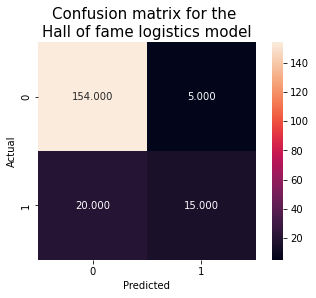

In [29]:
sns.heatmap(conf,annot = True, fmt= ".3f",square= True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for the \nHall of fame logistics model',
         fontsize=15)

## Using statsmodels Package

In [31]:
import statsmodels.formula.api as smf

In [33]:
#confusion a logistics model using the training set
lm = smf.logit(formula = 'HOF~Hits', data=train).fit()
lm.summary()

Optimization terminated successfully.
         Current function value: 0.313958
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    HOF   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Wed, 07 Sep 2022   Pseudo R-squ.:                  0.3398
Time:                        09:16:13   Log-Likelihood:                -182.10
converged:                       True   LL-Null:                       -275.82
Covariance Type:            nonrobust   LLR p-value:                 1.147e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4357      0.602    -12.360      0.000      -8.615      -6.257
Hits           0.0031      0.000     10.765      0.000       0.003       0.004
==============================================================================
"""

In [34]:
lm.params

Intercept   -7.435738
Hits         0.003108
dtype: float64

# K-nn

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
#Loads the iris dataset
from sklearn import datasets ## imports datasets from scikit-learn
iris = datasets.load_iris()

In [75]:
#define the data/predictiors as the pre-set feature names
X = pd.DataFrame(iris.data, columns = iris.feature_names)

#put the target (class of flower) in another DataFrame
y = iris.target

In [76]:
#subsets the data containing petal length and sepal length
X = X.iloc[:,[0,2]].values

In [77]:
#splits the data into training and test sets 
X_train,X_test,y_train,y_test =  train_test_split(X,y, test_size=.25)


In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
#standardizes the data
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
#initializes and runs the classifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
y_pred =classifier.predict(X_test)

In [81]:
# gives the confusion matrix
conf = metrics.confusion_matrix(y_test,y_pred)
print(conf)

[[14  0  0]
 [ 0 11  4]
 [ 0  2  7]]


Text(0.5, 1.0, 'Confusion matrix for the 3NN\nalgorithm performed on the IRIS data')

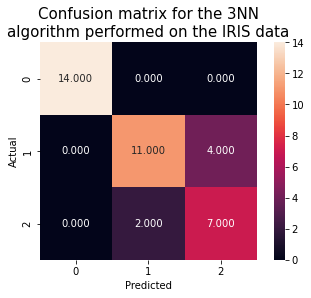

In [85]:
sns.heatmap(conf,annot = True, fmt= ".3f",square= True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for the 3NN\nalgorithm performed on the IRIS data',
         fontsize=15)

In [84]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.85      0.73      0.79        15
           2       0.64      0.78      0.70         9

    accuracy                           0.84        38
   macro avg       0.83      0.84      0.83        38
weighted avg       0.85      0.84      0.84        38

